In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import squarify 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\3259909691.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2[column] = dataframe2[column].astype('float64')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


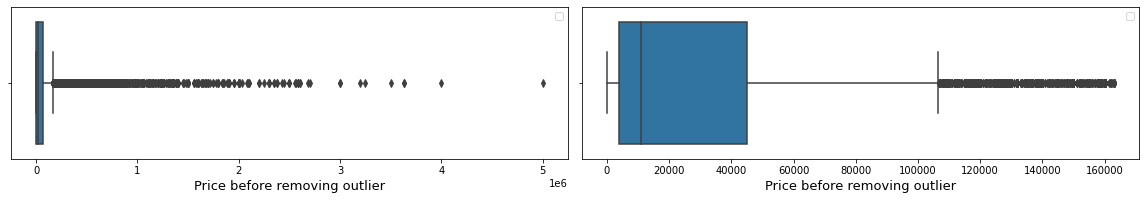

In [2]:
dataframe = pd.read_csv("final_eda.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()
dataframe['Facade'].fillna('None', inplace=True)
dataframe['Entrance'].fillna('None', inplace=True)
dataframe['Area'].fillna(dataframe['Area'].mean(), inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()
a = dataframe[dataframe['District']=="hà nội  long biên"]
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Price', 'Price']):
    label = "Price before removing outlier"
    if index==1:
        columns = ['Facade', 'Price', 'Area']
        main_index = []
        for column in columns:
            dataframe2 = dataframe[dataframe[column]!='None']
            dataframe2[column] = dataframe2[column].astype('float64')
            Q1 = dataframe2.quantile(0.25)[column]
            Q3 = dataframe2.quantile(0.75)[column]
            IQR = Q3 - Q1
            indexs = list(dataframe2[dataframe2[column] < Q1 - 1.5 * IQR].index) + list(dataframe2[dataframe2[column] > Q3 + 1.5 * IQR].index)
            main_index += indexs

        indexs = [i for i in range(len(dataframe)) if i not in main_index]
        dataframe = dataframe.iloc[indexs]  
        dataframe.Price.describe()

    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe['Price'])
    t.set_xlabel(xlabel=label, fontsize=13)
    t.legend()
fig.tight_layout(pad=1.0);

In [3]:
dataframe = pd.read_csv("final_eda.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()

,Unnamed: 0,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,0,0,nam,bắc,3,2,None,None,NaN,NaN,tây hồ,phú thượng,none,100.00,4000.000,21.087703,105.804831
1,1,1,nam,bắc,2,2,+đỏ+hồng,None,NaN,NaN,tây hồ,phú thượng,võ chí công,80.74,3496.042,21.087703,105.804831
2,2,2,None,None,3,3,+đỏ+hồng,None,NaN,NaN,cầu giấy,yên hòa,dương đình nghệ,131.00,5900.000,21.018631,105.798636
3,3,3,None,None,5,None,+đỏ+hồng,5,NaN,NaN,long biên,bồ đề,bồ đề,52.00,6750.000,21.038845,105.875416
4,4,4,None,None,3,2,+đỏ+hồng,None,NaN,NaN,nam từ liêm,cầu diễn,hàm nghi,119.00,5800.000,21.034359,105.762291


In [4]:
# Checking the missing values
dataframe.isnull().mean()

Unnamed: 0          0.000000
index               0.000000
HouseDirection      0.000000
BalconyDirection    0.000000
Bedrooms            0.000000
Toilets             0.000000
Legits              0.000000
Floors              0.000000
Facade              0.277744
Entrance            0.825985
District            0.000000
Ward                0.000022
Street              0.000000
Area                0.000000
Price               0.000000
X                   0.000000
Y                   0.000000
dtype: float64

In [5]:
# Fill nan
dataframe['Facade'].fillna('None', inplace=True)
dataframe['Entrance'].fillna('None', inplace=True)
dataframe['Area'].fillna('None', inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()

Unnamed: 0          0
index               0
HouseDirection      0
BalconyDirection    0
Bedrooms            0
Toilets             0
Legits              0
Floors              0
Facade              0
Entrance            0
District            0
Ward                0
Street              0
Area                0
Price               0
X                   0
Y                   0
dtype: int64

In [6]:
# Drop the wrong value
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\scipy\stats\stats.py:2857: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

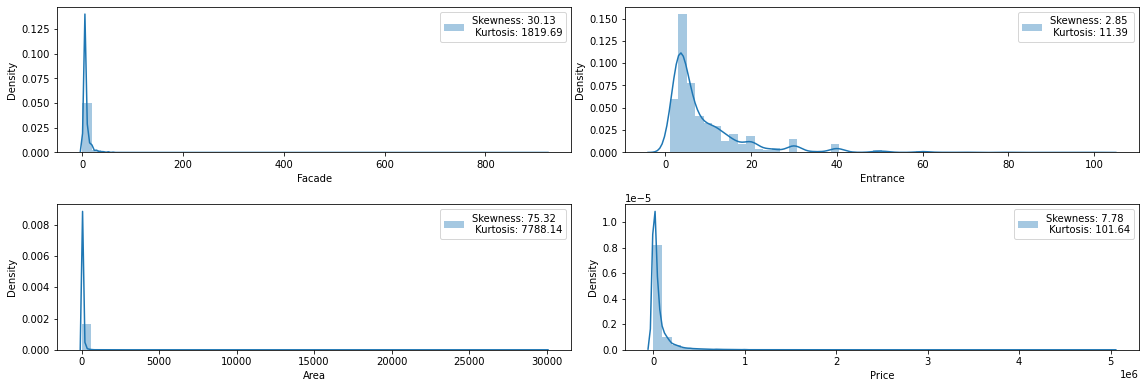

In [7]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(dataframe[dataframe[col] != 'None'].loc[:,col], label="Skewness: %.2f \n Kurtosis: %.2f" %(dataframe[dataframe[col] != 'None'].loc[:, col].skew(), dataframe[dataframe[col] != 'None'].loc[:, col].kurt()))
    t.legend()
fig.tight_layout(pad=1.0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


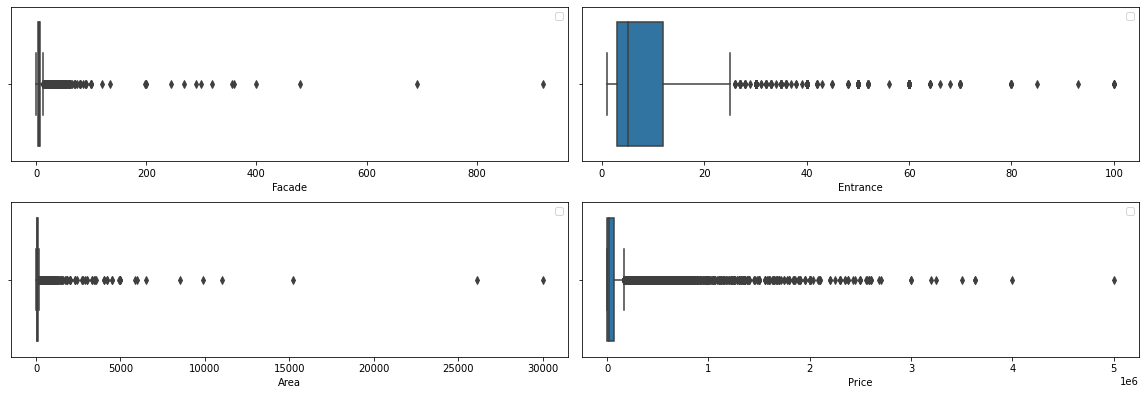

In [8]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe[dataframe[col] != 'None'][col])
    t.legend()
fig.tight_layout(pad=1.0);

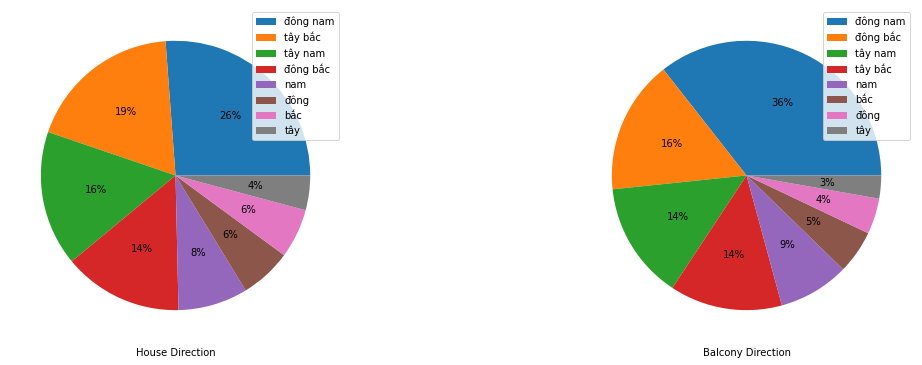

In [9]:
fig = plt.figure(figsize=(16,30))
labels = ["House Direction", "Balcony Direction"]
for index, col in enumerate(["HouseDirection", "BalconyDirection"]):
    plt.subplot(6,2,index+1)
    t = dataframe[dataframe[col]!='None'][col].value_counts(normalize=True).plot(kind='pie', labeldistance=None, autopct="%1.0f%%", legend=True)
    t.set_xlabel(labels[index])
    t.set_ylabel("")
    t.legend()
fig.tight_layout(pad=1.0);

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\3801642145.py:5: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


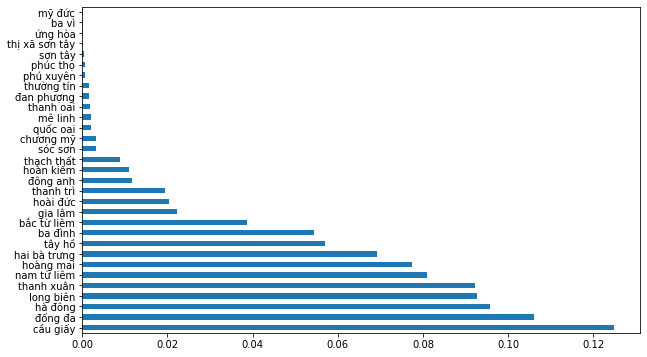

In [10]:
plt.figure(figsize=(10,6))
dataframe[dataframe['District']!='None'].District.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\1879946917.py:8: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


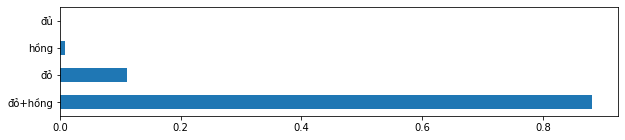

In [11]:
plt.figure(figsize=(10,2))
dataframe['Legits'] = dataframe['Legits'].replace(['+đỏ'], 'đỏ')
dataframe['Legits'] = dataframe['Legits'].replace(['+hồng'], 'hồng')
dataframe['Legits'] = dataframe['Legits'].replace(['+đỏ+hồng'], 'đỏ+hồng')
dataframe[dataframe['Legits']!='None'].Legits.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

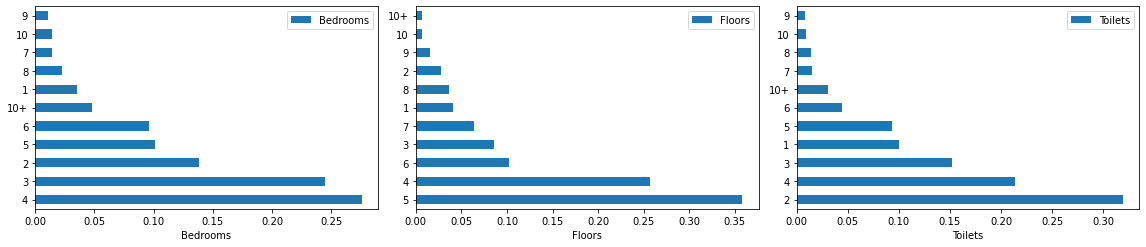

In [12]:
fig = plt.figure(figsize=(16,20))
labels = ["Bedrooms", "Floors", "Toilets"]
for index, col in enumerate(labels):
    plt.subplot(6,3,index+1)
    t = dataframe[dataframe[col]!='None'][col].value_counts(normalize=True).plot.barh()
    t.set_xlabel(labels[index])
    t.set_ylabel("")
    t.legend()
fig.tight_layout(pad=1.0);

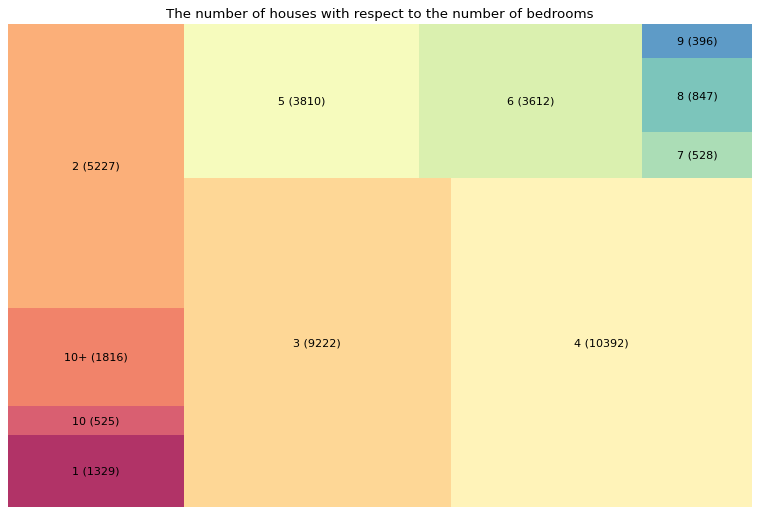

In [13]:
bedroom = dataframe[dataframe['Bedrooms']!='None']
bedroom=bedroom.groupby('Bedrooms').size().reset_index(name='counts')
labels = bedroom.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = bedroom['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('The number of houses with respect to the number of bedrooms')
plt.axis('off')
plt.show()

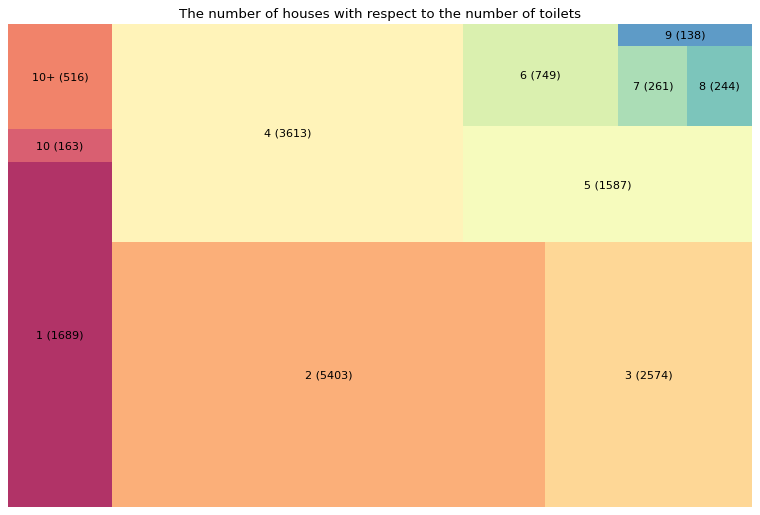

In [14]:
toilet = dataframe[dataframe['Toilets']!='None']
toilet=toilet.groupby('Toilets').size().reset_index(name='counts')
labels = toilet.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = toilet['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('The number of houses with respect to the number of toilets')
plt.axis('off')
plt.show()

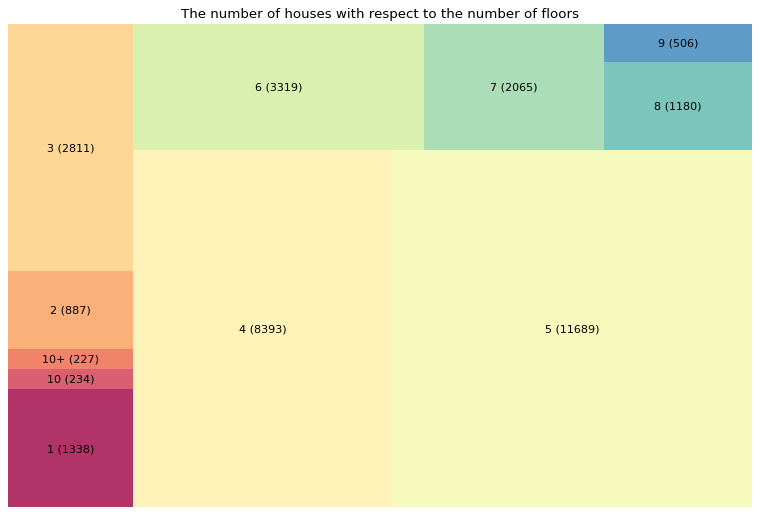

In [15]:
floor = dataframe[dataframe['Floors']!='None']
floor=floor.groupby('Floors').size().reset_index(name='counts')
labels = floor.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = floor['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('The number of houses with respect to the number of floors')
plt.axis('off')
plt.show()

In [16]:
columns = ['Facade', 'Price', 'Area']
main_index = []
for column in columns:
    dataframe2 = dataframe[dataframe[column]!='None']
    dataframe2[column] = dataframe2[column].astype('float64')
    Q1 = dataframe2.quantile(0.25)[column]
    Q3 = dataframe2.quantile(0.75)[column]
    IQR = Q3 - Q1
    index = list(dataframe2[dataframe2[column] < Q1 - 1.5 * IQR].index) + list(dataframe2[dataframe2[column] > Q3 + 1.5 * IQR].index)
    main_index += index

index = [i for i in range(len(dataframe)) if i not in main_index]
dataframe = dataframe.iloc[index]  
dataframe.Price.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\3022743748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2[column] = dataframe2[column].astype('float64')


count     38367.000000
mean      29680.538231
std       36869.959466
min          14.000000
25%        3900.000000
50%       11000.000000
75%       45000.000000
max      163000.000000
Name: Price, dtype: float64

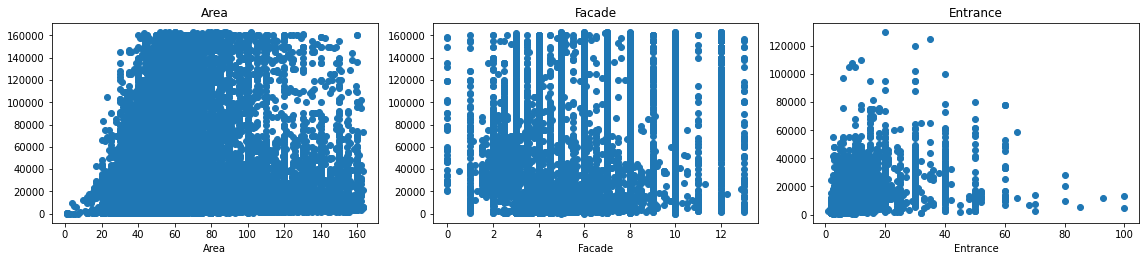

In [17]:
fig = plt.figure(figsize=(16,20))
labels = ["Area", "Facade", "Entrance"]
for index, col in enumerate(labels):
    plt.subplot(6,3,index+1)
    dataframe2 = dataframe[dataframe[col]!="None"]
    plt.scatter(dataframe2[col], dataframe2.Price)
    plt.xlabel(labels[index])
    plt.ylabel("")
    plt.title(labels[index])
fig.tight_layout(pad=1.0);

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\343954340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bedroom_price = bedroom_price[dataframe['Bedrooms']!='10+']
C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\343954340.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bedroom_price['Bedrooms'], rotation=60, horizontalalignment= 'right')


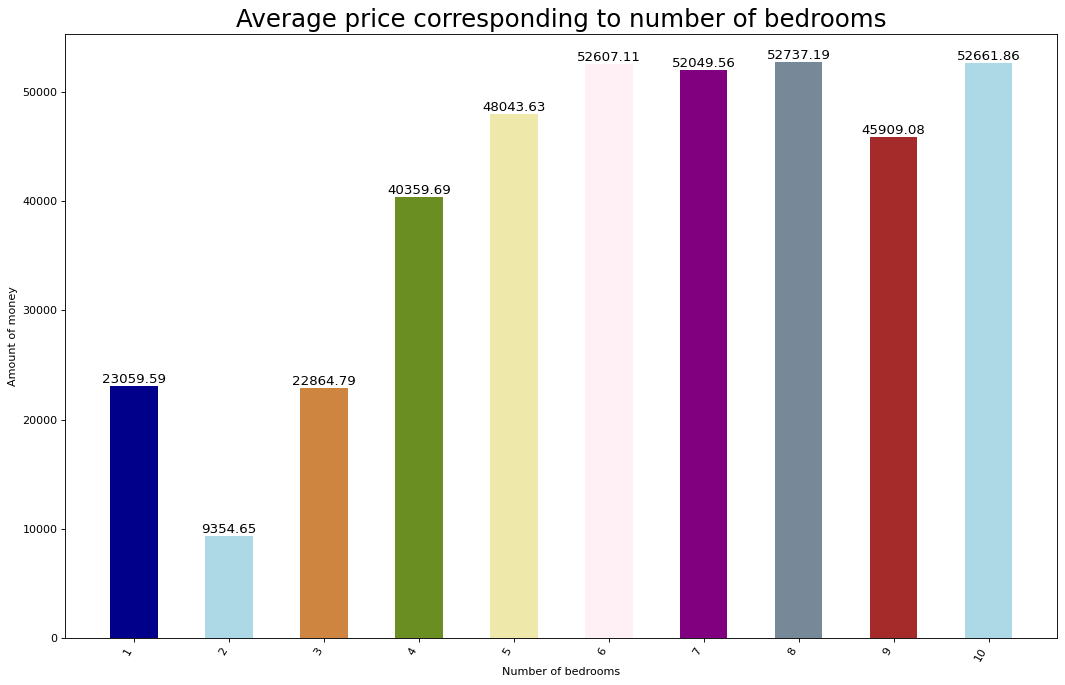

In [18]:
bedroom_price = dataframe[dataframe['Bedrooms']!='None']
bedroom_price = bedroom_price[dataframe['Bedrooms']!='10+']
bedroom_price = bedroom_price.groupby('Bedrooms')
bedroom_price = bedroom_price['Price'].mean().reset_index(name='Amount of money')
bedroom_price['order'] = bedroom_price['Bedrooms'].apply(lambda x: int(x))
bedroom_price = bedroom_price.sort_values(by = 'order') 
bedroom_price['Amount of money'] = bedroom_price['Amount of money'].apply(lambda x : round(x, 2))
n = bedroom_price['Bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(bedroom_price['Bedrooms'], bedroom_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(bedroom_price['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(bedroom_price['Bedrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of bedrooms", fontsize=22)
plt.ylabel('Amount of money')
plt.xlabel("Number of bedrooms")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\647123776.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  toilet = toilet[dataframe['Toilets']!='10+']
C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\647123776.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(toilet['Toilets'], rotation=60, horizontalalignment= 'right')


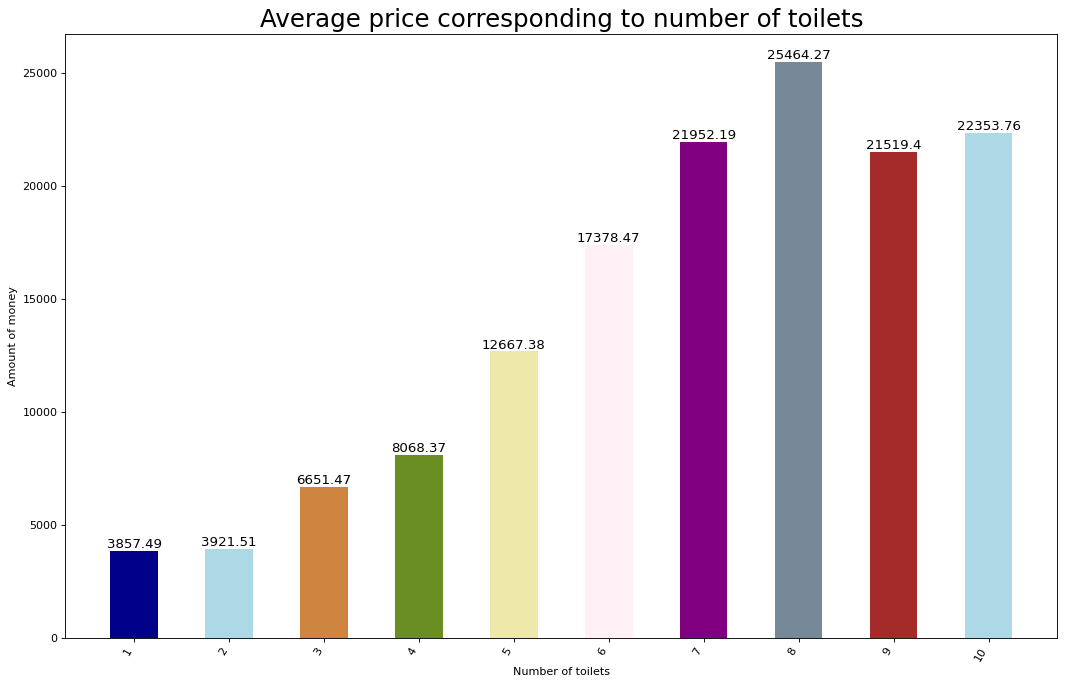

In [19]:
toilet = dataframe[dataframe['Toilets']!='None']
toilet = toilet[dataframe['Toilets']!='10+']
toilet = toilet.groupby('Toilets')['Price'].mean().reset_index(name='Amount of money')
toilet['order'] = toilet['Toilets'].apply(lambda x: int(x))
toilet= toilet.sort_values(by = 'order') 
toilet['Amount of money'] = toilet['Amount of money'].apply(lambda x : round(x, 2))
n = toilet['Toilets'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(toilet['Toilets'], toilet['Amount of money'], color=c, width=.5)
for i, val in enumerate(toilet['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(toilet['Toilets'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of toilets", fontsize=22)
plt.ylabel('Amount of money')
plt.xlabel("Number of toilets")
plt.show()

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


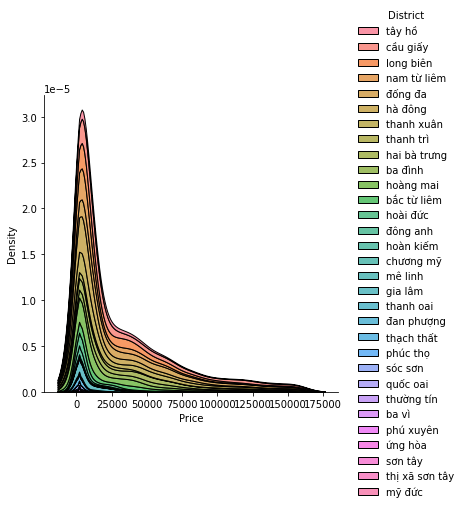

In [20]:
district = dataframe.copy()
sns.displot(district, x="Price", hue="District", kind="kde", multiple="stack")

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\1901599954.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(district_price['District'], rotation=60, horizontalalignment= 'right')


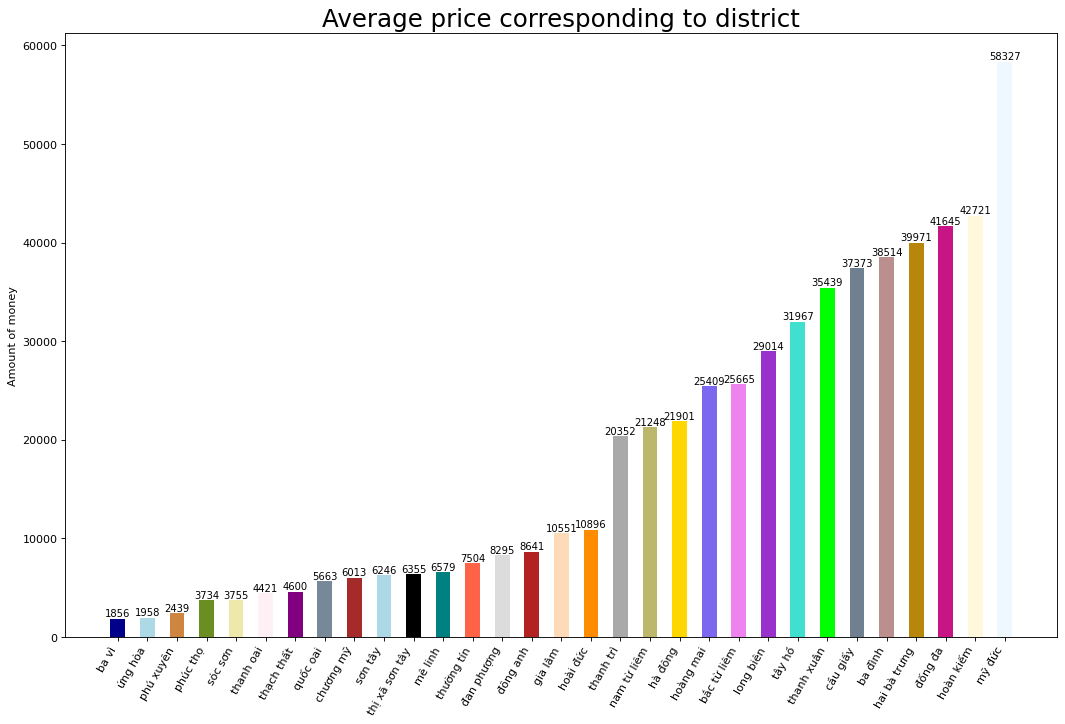

In [21]:
district_price = dataframe[dataframe['District']!='None']
district_price = district_price.groupby('District')['Price'].mean().reset_index(name='Amount of money')
district_price = district_price.sort_values(by = 'Amount of money') 
district_price['Amount of money'] = district_price['Amount of money'].apply(lambda x : int(x))
n = district_price['District'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(district_price['District'], district_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(district_price['Amount of money'].values):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
plt.gca().set_xticklabels(district_price['District'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to district", fontsize=22)
plt.ylabel('Amount of money')
plt.show()

<Figure size 800x640 with 0 Axes>

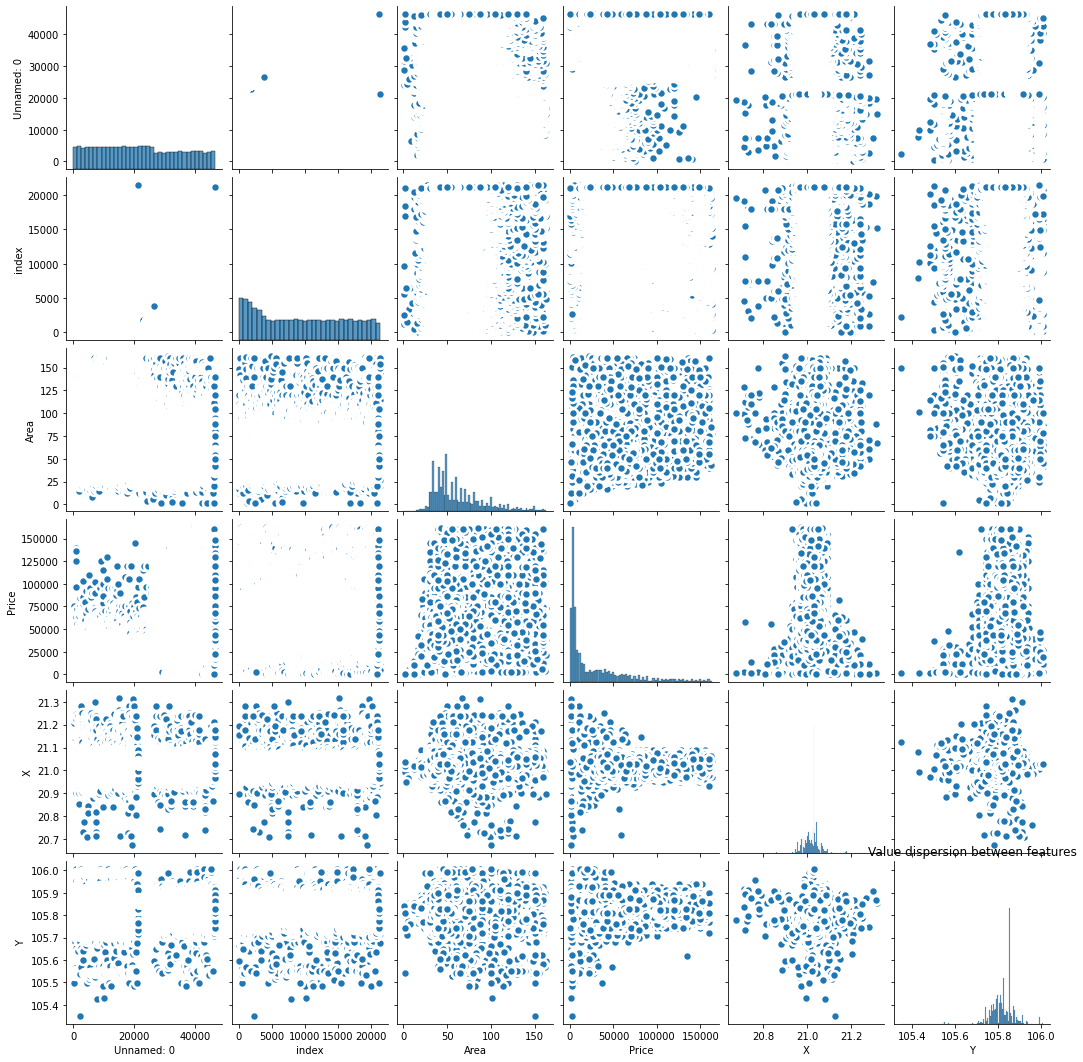

In [22]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataframe, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Value dispersion between features')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\290154400.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(house_price['HouseDirection'], rotation=60, horizontalalignment= 'right')


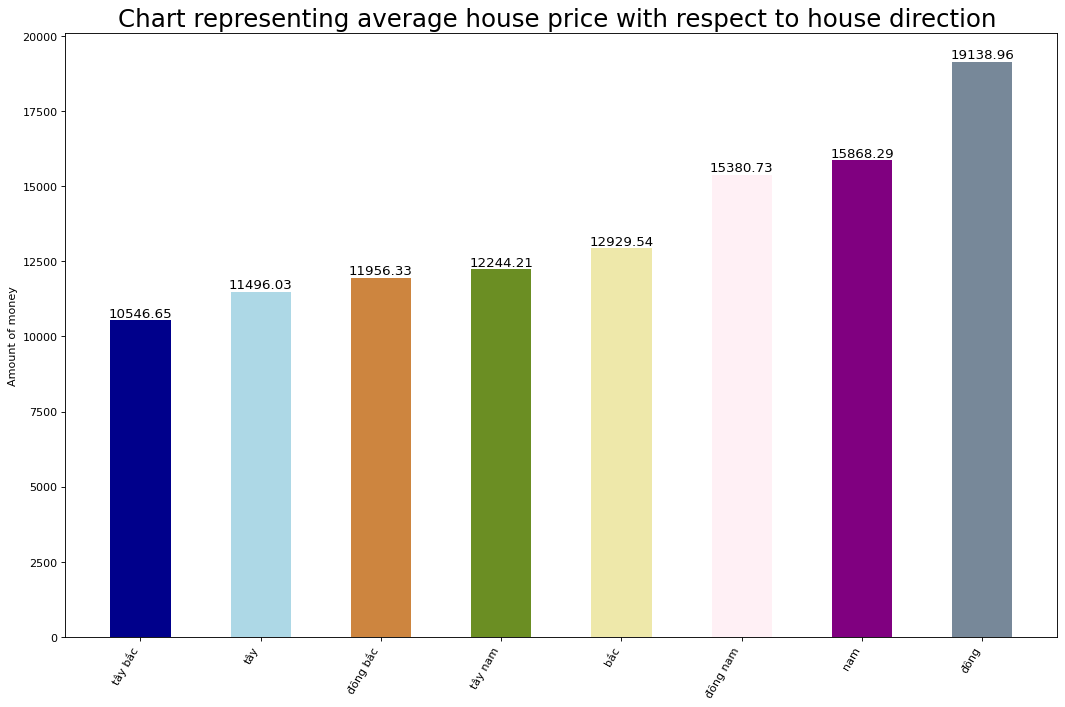

In [23]:
house_price = dataframe[dataframe['HouseDirection']!='None']
house_price = house_price.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
house_price = house_price.sort_values(by = 'Amount of money') 
house_price['Amount of money'] = house_price['Amount of money'].apply(lambda x : round(x, 2))
n = house_price['HouseDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(house_price['HouseDirection'], house_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(house_price['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(house_price['HouseDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to house direction ", fontsize=22)
plt.ylabel('Amount of money')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17748\3512838905.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(balcony_price['BalconyDirection'], rotation=60, horizontalalignment= 'right')


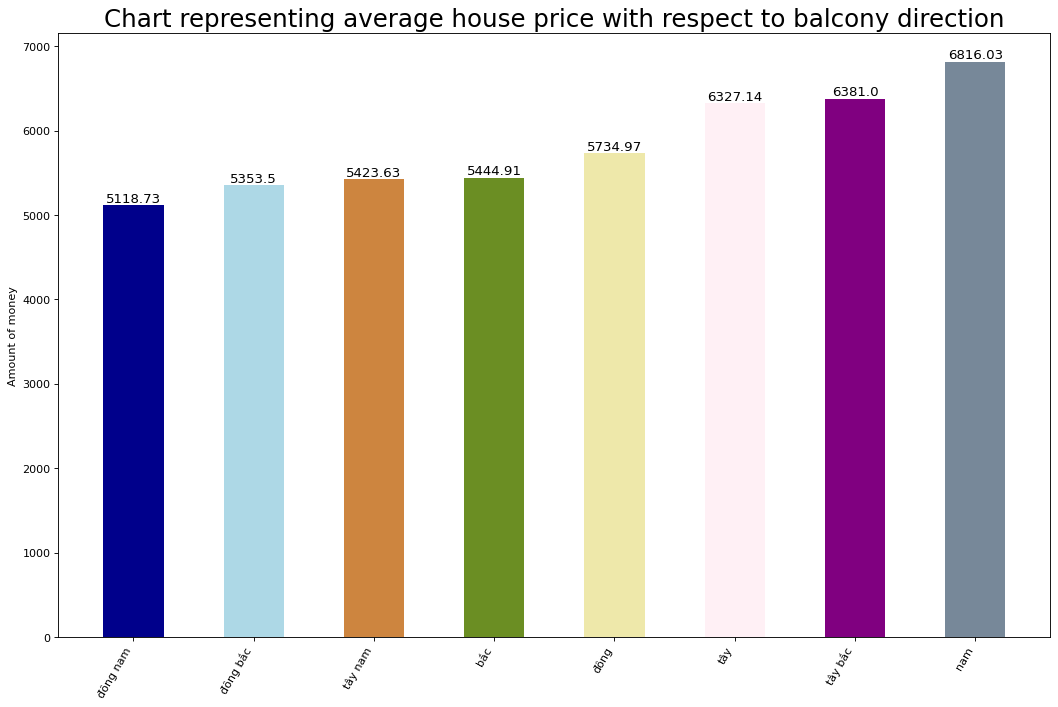

In [24]:
balcony_price = dataframe[dataframe['BalconyDirection']!='None']
balcony_price = balcony_price.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
balcony_price = balcony_price.sort_values(by = 'Amount of money') 
balcony_price['Amount of money'] = balcony_price['Amount of money'].apply(lambda x : round(x, 2))
n = balcony_price['BalconyDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(balcony_price['BalconyDirection'], balcony_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(balcony_price['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(balcony_price['BalconyDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to balcony direction", fontsize=22)
plt.ylabel('Amount of money')
plt.show()

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\scipy\stats\stats.py:2857: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

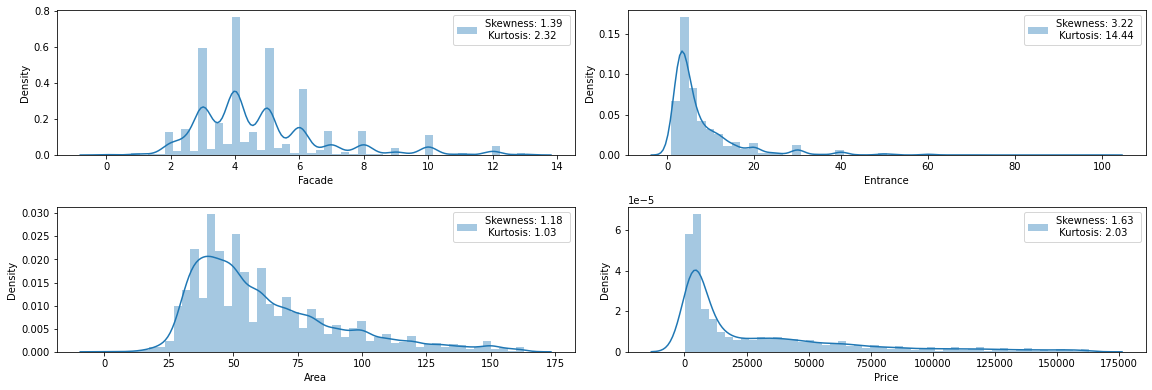

In [25]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(dataframe[dataframe[col] != 'None'].loc[:,col], label="Skewness: %.2f \n Kurtosis: %.2f" %(dataframe[dataframe[col] != 'None'].loc[:, col].skew(), dataframe[dataframe[col] != 'None'].loc[:, col].kurt()))
    t.legend()
fig.tight_layout(pad=1.0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


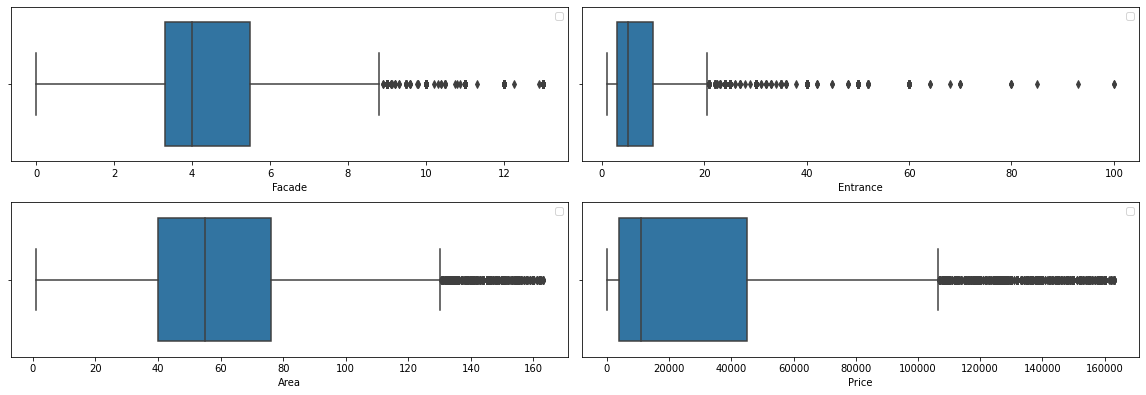

In [26]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe[dataframe[col] != 'None'][col])
    t.legend()
fig.tight_layout(pad=1.0);